<a href="https://colab.research.google.com/github/SarahAlhugail/Weekend_project_2/blob/main/ML_Weekend_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import what you need
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#### - Your target column is called `target`, this dataset is used for classification.

#### - Use what you have learned over the last two weeks to create a model that correctly predicts whether a mushroom is poisonous or edible.

#### - The data has already been loaded for you

[Data Source](https://archive.ics.uci.edu/ml/datasets/Mushroom)

# **Data Dictionary**


In [2]:
# Data Dictionary
!curl "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names"

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 



---

---





# **EDA**

What is this data?

Visualize some relationships

What do you see? What did you find?

![image](https://www.fukushihoken.metro.tokyo.lg.jp/shokuhin//////eng/kinoko/image/kiso_img_01.jpg)

In [3]:
col_names=["target", "cap_shape","cap_surface", "cap_color", "bruises", "odor", "gill-attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface-below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=col_names)
print(f"Mushroom Data Shape: {df.shape}")
df.head()

Mushroom Data Shape: (8124, 23)


,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.describe()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface-below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [6]:
df.isnull().sum()

target                      0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill-attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface-below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

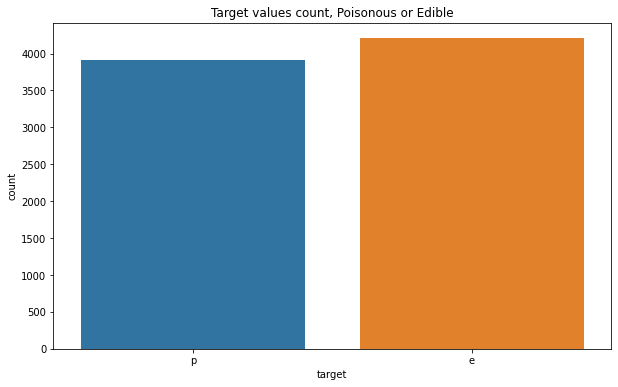

In [7]:
plt.figure(figsize=(10,6))


sns.countplot(data=df , x='target').set_title('Target values count, Poisonous or Edible');

**As we see in the figure above, The Edible class is more than Poisonous class**

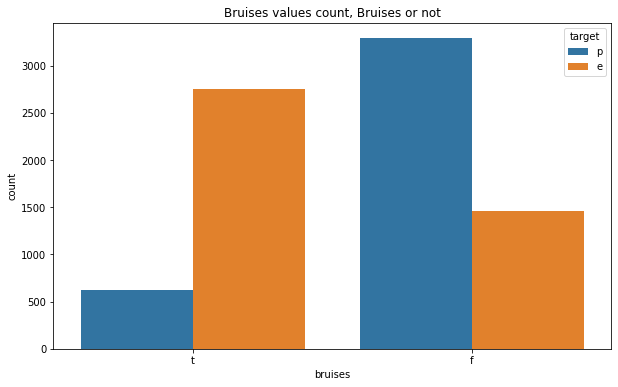

In [8]:



plt.figure(figsize=(10,6))


sns.countplot(data=df , x='bruises', hue ="target").set_title('Bruises values count, Bruises or not');

**As we see in the figure above, The most of edible mushroom has bruises.**

**and the Poisonous mushroom hasn't bruises**

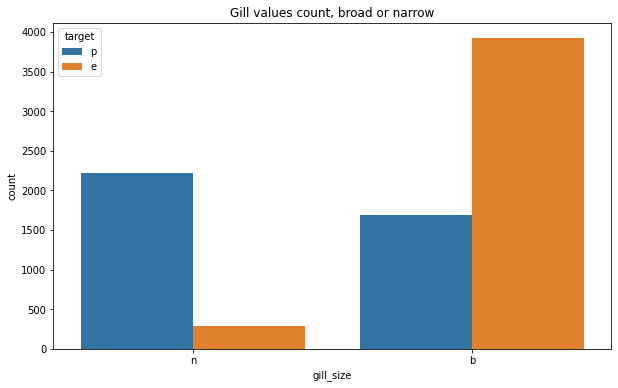

In [9]:
plt.figure(figsize=(10,6))


sns.countplot(data=df , x='gill_size', hue ="target").set_title('Gill values count, broad or narrow');



**As we see in the figure above, The most of edible mushroom has a broad gill**.



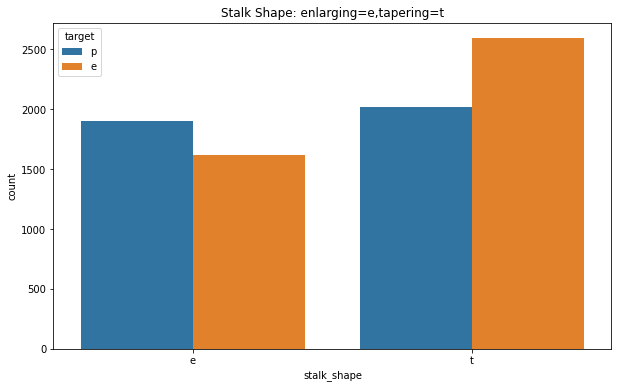

In [10]:

plt.figure(figsize=(10,6))


sns.countplot(data=df , x='stalk_shape', hue ="target").set_title('Stalk Shape: enlarging=e,tapering=t');

**As  we see in the figure above, the tapering shape is more than enlarging shape**

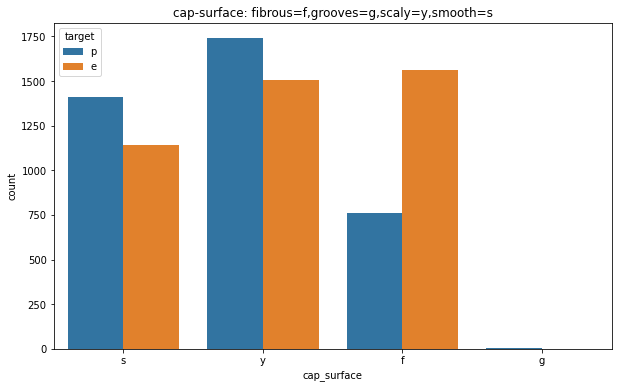

In [11]:
plt.figure(figsize=(10,6))


sns.countplot(data=df , x='cap_surface', hue ="target").set_title('cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s');


**As we see in the figure above, the most fibrous surface is Edible ,and all the grooves surface is Poisonous**




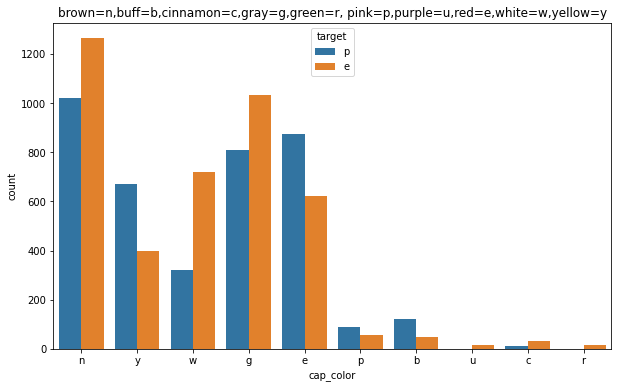

In [12]:
plt.figure(figsize=(10,6))



sns.countplot(x='cap_color', data=df, hue= 'target').set_title('brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y',fontsize=12);

**As we see in the figure above, the brown color has the highest number,  the brown color is the most edible type. Also the green the purple color has no Poisonous mushroom at all**

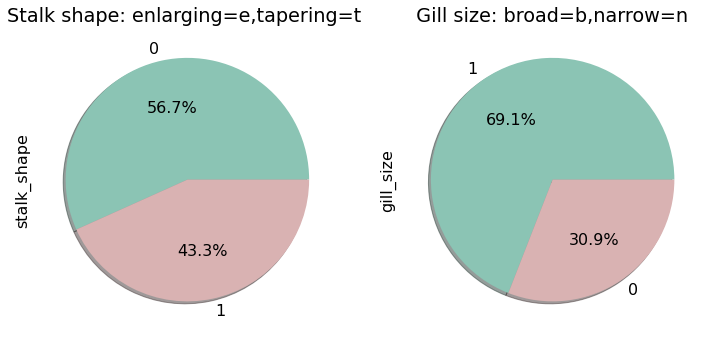

In [50]:
#pie chart 

f,ax=plt.subplots(1,2, figsize=(12,12))
df['stalk_shape'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['#8bc4b4' ,'#d9b2b2'])

df['gill_size'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['#8bc4b4' ,'#d9b2b2'] )

ax[0].set_title('Stalk shape: enlarging=e,tapering=t ')
ax[1].set_title(' Gill size: broad=b,narrow=n ')

plt.show()




---



# **Data prep & train_test_split()**

Make this data ready for a ML model
Decide which features to include
Split into training and testing datasets

In [14]:
df.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [15]:
# drop this column because it has only 1 value  

df.drop(['veil_type'],axis=1, inplace=True)

In [16]:
df.columns

Index(['target', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill-attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface-below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [17]:
#Convert values into 0 1 

df['target'] = df['target'].map({'e': 1, 'p': 0}).astype(int)
df['bruises'] = df['bruises'].map({'t': 1, 'f': 0}).astype(int)
df['gill_size'] = df['gill_size'].map({'b': 1, 'n': 0}).astype(int)
df['stalk_shape'] = df['stalk_shape'].map({'e': 1, 't': 0}).astype(int)




In [18]:
df.head()


,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,x,s,n,1,p,f,c,0,k,1,e,s,s,w,w,w,o,p,k,s,u
1,1,x,s,y,1,a,f,c,1,k,1,c,s,s,w,w,w,o,p,n,n,g
2,1,b,s,w,1,l,f,c,1,n,1,c,s,s,w,w,w,o,p,n,n,m
3,0,x,y,w,1,p,f,c,0,n,1,e,s,s,w,w,w,o,p,k,s,u
4,1,x,s,g,0,n,f,w,1,k,0,e,s,s,w,w,w,o,e,n,a,g


In [19]:
#dummies

df_new= pd.get_dummies(df.iloc[:,0:24])
df_new


,target,bruises,gill_size,stalk_shape,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill_spacing_c,gill_spacing_w,gill_color_b,gill_color_e,gill_color_g,...,stalk_color_below_ring_g,stalk_color_below_ring_n,stalk_color_below_ring_o,stalk_color_below_ring_p,stalk_color_below_ring_w,stalk_color_below_ring_y,veil_color_n,veil_color_o,veil_color_w,veil_color_y,ring_number_n,ring_number_o,ring_number_t,ring_type_e,ring_type_f,ring_type_l,ring_type_n,ring_type_p,spore_print_color_b,spore_print_color_h,spore_print_color_k,spore_print_color_n,spore_print_color_o,spore_print_color_r,spore_print_color_u,spore_print_color_w,spore_print_color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [20]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

In [21]:
# from sklearn.model_selection import train_test_split
# vars =['bruises','gill_size','stalk_surface_above_ring_s',
#              'stalk_surface-below_ring_s','cap_color_n'	,
#              'gill_color_b','stalk_surface_above_ring_k','stalk_surface-below_ring_k',
#              'ring_type_p','ring_type_l']

# X=df_new[vars]
# y=df_new.target

# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75,random_state=2)


In [22]:
#Split  
from sklearn.model_selection import train_test_split
vars =['stalk_surface_above_ring_s',
             'stalk_surface-below_ring_s'	,'odor_f'	,
             'gill_color_b','stalk_surface-below_ring_k',
             'ring_type_p']

X=df_new[vars]
y=df_new.target

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75,random_state=2)




---


# **Baseline model**
What is your baseline model?

Explain what's going on:

When starting on a project, the first priority is learning about what potentially unforeseen challenges will stand in your way. Even if they will not be the final version of your model, baselines allow you to iterate very quickly, while wasting minimal time.




In [23]:
# let's predict the average
np.mean(y_train)

0.5128836369604464

In [24]:
# create baseline model 
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = np.mean(y_train)  # what value to predict?

baseline_model(n_predictions, baseline_value)

0       0.512884
1       0.512884
2       0.512884
3       0.512884
4       0.512884
          ...   
2026    0.512884
2027    0.512884
2028    0.512884
2029    0.512884
2030    0.512884
Length: 2031, dtype: float64

In [25]:
n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_preds = baseline_model(n_predictions, baseline_value)

baseline_acc=accuracy_score(y_test, baseline_preds) #Accuracy score of baseline model 
baseline_acc

0.5332348596750369

Here we create a baseline model to compare it with our model.

whene we predict the mean of single value we got `0.512884`

and we got `0.5332348596750369` for  the accuracy score 


---








# **Create a model**



## KNeighborsClassifier

In [26]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
#predict
knn.predict(X_test)


array([1, 0, 1, ..., 1, 1, 1])

In [28]:
knn.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [29]:
 #KNN accuracy score
 
 Knn_acc= accuracy_score(y_test, knn.predict(X_test))
Knn_acc

0.9251600196947316

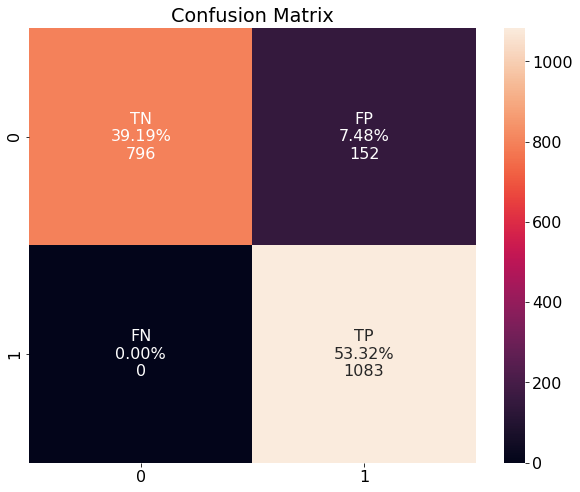

In [30]:
# create confusion matrix

y_pred = knn.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

The goal is to show high percentage of the Edible


Edible = 1 , Poisonous= 0

  

TP = predicted Edible, is Edible

FP = predicted Edible, is Poisonous

TN = predicted Poisonous, is Poisonous

FN = predicted Poisonous, is Edible

It's good result because we have 53% of TP wich mean it is high percentage. 


---




## SGDClassifier

In [31]:
# SGDCClassifier

from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

In [32]:
sgdc.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
# ptrdict
preds = sgdc.predict(X_test)
preds

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
# SGDClassifier Accuracy score
sgdc_acc = accuracy_score(y_test, preds)
sgdc_acc

0.9251600196947316

## LogisticRegression

In [35]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#predict
preds = lr.predict(pd.DataFrame(X_test))
preds

array([1, 0, 1, ..., 1, 1, 1])

In [37]:
#LogisticRegression Accuracy score
lr_acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
lr_acc


0.9251600196947316

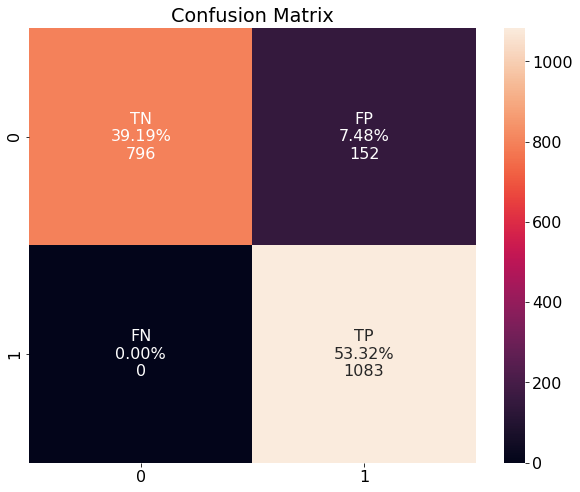

In [38]:
#LogisticRegression confusion matrix
y_pred = lr.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

**The goeal is to show high percentage of the Edible Mushroom**

Edible = 1 , Poisonous= 0

TP = predicted Edible, is Edible

FP = predicted Edible, is Poisonous

TN = predicted Poisonous, is Poisonous

FN = predicted Poisonous, is Edible

It's good result because we have 53% of TP wich mean it is high percentage. 





---


# **Compare your results to the baseline**


We got a same accuracy with all three models 

KNN=`0.9251600196947316`

sgdc=`0.9251600196947316`

LogisticRegression=`0.9251600196947316`

And we got `0.5332348596750369` accuracy score in Baseline model



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

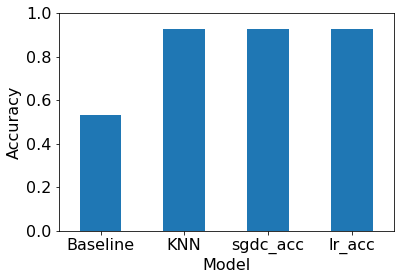

In [39]:
pd.DataFrame([baseline_acc , Knn_acc,sgdc_acc,lr_acc]).plot.bar();
plt.xticks(np.arange(4),('Baseline','KNN','sgdc_acc','lr_acc'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
#plt.title('Comparing Model Accuracy');‏

# Optimize the model

## GridSearchSV
logisticRegression


In [40]:
p_grid = {'fit_intercept': [True, False],
          'max_iter': [100, 250, 1000, 10000],
          'n_jobs':[-1,2,4],
          'verbose':[1,2,4]}

grid = GridSearchCV(lr, p_grid,cv=10 )
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000],
                         'n_jobs': [-1, 2, 4], 'verbose': [1, 2, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grid.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000],
                         'n_jobs': [-1, 2, 4], 'verbose': [1, 2, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'n_jobs': -1, 'verbose': 1}

In [43]:
lr = LogisticRegression(fit_intercept =True, max_iter =100, n_jobs=-1,verbose=1)

lr.fit(X_train, y_train)

lr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([1, 0, 1, ..., 1, 1, 1])

In [44]:
preds = lr.predict(X_test)

accuracy_score(y_test, preds)

0.9251600196947316


We got same Accuracy score (it doesn't affect the score)

## RandomizedSearchCV

In [45]:
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'],
                     fit_intercept=[True, False],
                     max_iter= [100, 250, 1000, 10000])


clf = RandomizedSearchCV(lr,distributions)

In [46]:
search = clf.fit(X_train, y_train)
search

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=1, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35b93312e8>,
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 250, 1000, 10000],
              

In [47]:
search.best_params_


{'C': 3.7500081136213668,
 'fit_intercept': True,
 'max_iter': 250,
 'penalty': 'l2'}

In [48]:
lr = LogisticRegression(C=1.811134360089274,fit_intercept= True, max_iter=250, penalty= 'l2')

lr.fit(X_train, y_train)

lr.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [49]:
preds = lr.predict(X_test)

accuracy_score(y_test, preds)


0.9251600196947316

Also with  `RandomizedSearchCV` We got same Accuracy score (it doesn't affect the score)

